### Author: Abel Fereja 
### Date: 31-Oct-2022 
### The Goal of the project is to perform EDA on some of the dataset containing list of mass shootings in US occurred between 2018. and 2022.
### Dataset source: 
Downloaded from Kaggle
### Datasets description: 
There are four datasets which contain list of mass shootings in US from 2018 to 2022.
### Credit to:
Manthan Shetigar, whose most codes are used for training purpose.

<h1 style="color:#c81d25;">Importing and installing Libraries</h1>

In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import dates
plt.style.use('fivethirtyeight')

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from geopy.geocoders import Nominatim
import folium
from folium import plugins
from folium.plugins import HeatMap

<h1 style="color:#c81d25;">Loading the datasets</h1>

In [4]:
df_2018 = pd.read_csv('shootings_2018.csv.xls')
df_2019 = pd.read_csv('shootings_2019.csv.xls')
df_2020 = pd.read_csv('shootings_2020.csv')
df_2021 = pd.read_csv('shootings_2021.csv')
df_2022 = pd.read_csv('2022.csv')

df = pd.concat([df_2018, df_2019,df_2020,df_2021,df_2022])
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,State,Dead,Injured,Total,Description
0,2018-12-31,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,2018-12-29,Ohio,1,3,4,One person was killed and three people were wo...
2,2018-12-28,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,2018-12-24,Louisiana,2,2,4,Three people were killed and two others were w...
4,2018-12-23,Missouri,0,7,7,Seven people were wounded during a shooting at...


<h1 style="color:#c81d25;">Basic Statistics</h1>

In [5]:
def about_data(df):
    
    
    print(df.info())
    
    print('='*50)
    
    print('\nBasic Statistics :\n')
    
    print(df.describe())
    
    print('='*50)
    
    print('\n data shape :',df.shape) #\n to get new line

    print('='*50)
    
    print('\nMissing Values :\n')
    
    print(df.isna().sum())
    
    print('='*50)
    
    print('\n Name of the columns in data\n')
    
    print(df.columns)
    
    
    
about_data(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 283
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2356 non-null   datetime64[ns]
 1   State        2356 non-null   object        
 2   Dead         2356 non-null   int64         
 3   Injured      2356 non-null   int64         
 4   Total        2356 non-null   int64         
 5   Description  2356 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 128.8+ KB
None

Basic Statistics :

              Dead      Injured        Total
count  2356.000000  2356.000000  2356.000000
mean      1.042869     4.079372     5.120968
std       1.577263     2.309967     2.573136
min       0.000000     0.000000     2.000000
25%       0.000000     3.000000     4.000000
50%       1.000000     4.000000     4.000000
75%       1.000000     5.000000     5.000000
max      23.000000    27.000000    46.000000



In [50]:
class myclass:    # another way using API-Application Programming Intereface
    
        print(df.info())
    
        print('='*50)

        print('\nBasic Statistics :\n')

        print(df.describe())

        print('='*50)

        print('\n data shape :',df.shape) #\n to get new line

        print('='*50)

        print('\nMissing Values :\n')

        print(df.isna().sum())

        print('='*50)

        print('\n Name of the columns in data\n')

        print(df.columns)
    
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 283
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2352 non-null   datetime64[ns]
 1   State        2352 non-null   object        
 2   Dead         2352 non-null   int64         
 3   Injured      2352 non-null   int64         
 4   Total        2352 non-null   int64         
 5   Description  2352 non-null   object        
 6   year         2352 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 147.0+ KB
None

Basic Statistics :

              Dead      Injured        Total         year
count  2352.000000  2352.000000  2352.000000  2352.000000
mean      1.040391     4.078656     5.119048  2020.075680
std       1.576783     2.308091     2.574345     1.226832
min       0.000000     0.000000     2.000000  2018.000000
25%       0.000000     3.000000     4.000000  2019.000000
50%      

<h1 style="color:#c81d25;">Dealing with Irregularites / Outliers</h1>


In [10]:
df[(df['Dead'] + df['Injured'] ) != df['Total']]

,Date,State,Dead,Injured,Total,Description
33,2018-11-11,Arizona,3,3,5,Three people were killed and one injured when ...
401,2019-02-16,Mississippi,4,0,5,Police responded to a domestic dispute at a re...
177,2021-09-19,South Carolina,1,7,7,After an argument escalated someone opened fir...
580,2021-03-26,Virginia,2,8,8,Eight people were injured after a fight led to...


There are such 4 records where :
> Total Victims != Dead + Injured

This can be considered as an outlier , We will drop these 4 records since they are just small sample of records

In [11]:
df =df[~((df['Dead'] + df['Injured'] ) != df['Total'])]
df.shape

(2352, 6)

<h1 style="color:#c81d25;">Get Lat and Lon by US state name</h1>

In [12]:
geolocator = Nominatim(timeout=1, user_agent = "myGeolocator")
grouped_state = df.groupby(['State'])['Total'].sum().reset_index()
def geocode_my_address(addr):
#     print('geocoding:', addr)
    try:
        x = geolocator.geocode(addr)
        lon_lat = x.longitude, x.latitude
        return lon_lat
    except:
#         print("problem with address:", addr)
        lon_lat = None, None
        return lon_lat

grouped_state['lon'], grouped_state['lat'] = zip(*grouped_state['State'].apply(lambda x: geocode_my_address(x)))

<h1 style="color:#c81d25;">Bubble Map of Victim counts</h1>

In [13]:
import folium

# Make an empty map
m = folium.Map(location=[40, -95], tiles="Stamen Toner", zoom_start=4)


for i in range(0,len(grouped_state)):
    folium.Circle(
      location=[grouped_state.iloc[i]['lat'], grouped_state.iloc[i]['lon']],
      popup=grouped_state.iloc[i]['State'],
      radius=float(grouped_state.iloc[i]['Total'])*200,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)


m

<h1 style="color:#c81d25;">Visualize Trends Over the Years</h1>

In [14]:
df["year"] = pd.DatetimeIndex(df["Date"]).year

In [15]:
df['year']

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
279    2022
280    2022
281    2022
282    2022
283    2022
Name: year, Length: 2352, dtype: int64

In [16]:
df_group = df.reset_index().groupby(['State', 'year'], dropna=True)['Total'].aggregate('sum').unstack()
    
df_group = df_group.dropna()

In [17]:
df_group

year,2018,2019,2020,2021,2022
State,,,,,
Alabama,55.0,67.0,57.0,107.0,43.0
Arizona,12.0,29.0,20.0,49.0,43.0
Arkansas,20.0,22.0,59.0,27.0,43.0
California,191.0,238.0,184.0,229.0,131.0
Colorado,30.0,22.0,60.0,73.0,25.0
Connecticut,8.0,13.0,33.0,8.0,8.0
Florida,170.0,96.0,158.0,184.0,53.0
Georgia,32.0,88.0,90.0,123.0,66.0
Illinois,168.0,209.0,347.0,450.0,86.0


In [18]:
df_group['Total'] = df_group[2018] + df_group[2019] + df_group[2020] +df_group[2021] +df_group[2022]

In [19]:
df_group['Total']

State
Alabama            329.0
Arizona            153.0
Arkansas           171.0
California         973.0
Colorado           210.0
Connecticut         70.0
Florida            661.0
Georgia            399.0
Illinois          1260.0
Indiana            235.0
Kansas              60.0
Kentucky           147.0
Louisiana          565.0
Maryland           345.0
Michigan           364.0
Minnesota          132.0
Mississippi        223.0
Missouri           363.0
Nevada             105.0
New Jersey         262.0
New Mexico          65.0
New York           537.0
North Carolina     369.0
Ohio               467.0
Oklahoma            90.0
Pennsylvania       559.0
South Carolina     362.0
Tennessee          350.0
Texas             1009.0
Virginia           229.0
Washington          99.0
Wisconsin          181.0
Name: Total, dtype: float64

In [20]:
df_group = df_group.sort_values('Total',ascending=False)[:5]

In [21]:
df_group

year,2018,2019,2020,2021,2022,Total
State,,,,,,
Illinois,168.0,209.0,347.0,450.0,86.0,1260.0
Texas,91.0,255.0,170.0,304.0,189.0,1009.0
California,191.0,238.0,184.0,229.0,131.0,973.0
Florida,170.0,96.0,158.0,184.0,53.0,661.0
Louisiana,63.0,112.0,143.0,156.0,91.0,565.0


In [22]:
df_group = df_group.drop(columns=['Total'],axis=1)

In [23]:
df_group

year,2018,2019,2020,2021,2022
State,,,,,
Illinois,168.0,209.0,347.0,450.0,86.0
Texas,91.0,255.0,170.0,304.0,189.0
California,191.0,238.0,184.0,229.0,131.0
Florida,170.0,96.0,158.0,184.0,53.0
Louisiana,63.0,112.0,143.0,156.0,91.0


In [24]:
cols = [2018, 2019, 2020, 2021, 2022]
index = ['Illinois', 'California', 'Texas', 'Florida', 'Louisiana','Pennsylvania', 'New York', 'Georgia', 'Missouri', 'North Carolina']

In [25]:
cols

[2018, 2019, 2020, 2021, 2022]

In [26]:
index

['Illinois',
 'California',
 'Texas',
 'Florida',
 'Louisiana',
 'Pennsylvania',
 'New York',
 'Georgia',
 'Missouri',
 'North Carolina']

In [27]:
df_group

year,2018,2019,2020,2021,2022
State,,,,,
Illinois,168.0,209.0,347.0,450.0,86.0
Texas,91.0,255.0,170.0,304.0,189.0
California,191.0,238.0,184.0,229.0,131.0
Florida,170.0,96.0,158.0,184.0,53.0
Louisiana,63.0,112.0,143.0,156.0,91.0


In [28]:
df_group = df_group.transpose()

In [29]:
df_group

State,Illinois,Texas,California,Florida,Louisiana
year,,,,,
2018,168.0,91.0,191.0,170.0,63.0
2019,209.0,255.0,238.0,96.0,112.0
2020,347.0,170.0,184.0,158.0,143.0
2021,450.0,304.0,229.0,184.0,156.0
2022,86.0,189.0,131.0,53.0,91.0


In [30]:
df_group.index

Index([2018, 2019, 2020, 2021, 2022], dtype='object', name='year')

In [31]:
df_group = df_group.reset_index()

In [32]:
df_group.index

RangeIndex(start=0, stop=5, step=1)

In [33]:
df_group = df_group.set_index('year',drop=True)

In [34]:
df_group.index

Int64Index([2018, 2019, 2020, 2021, 2022], dtype='int64', name='year')

In [35]:
df_group

State,Illinois,Texas,California,Florida,Louisiana
year,,,,,
2018,168.0,91.0,191.0,170.0,63.0
2019,209.0,255.0,238.0,96.0,112.0
2020,347.0,170.0,184.0,158.0,143.0
2021,450.0,304.0,229.0,184.0,156.0
2022,86.0,189.0,131.0,53.0,91.0


In [36]:
df_group = df_group[:-1] #remove 2022

In [37]:
df_group

State,Illinois,Texas,California,Florida,Louisiana
year,,,,,
2018,168.0,91.0,191.0,170.0,63.0
2019,209.0,255.0,238.0,96.0,112.0
2020,347.0,170.0,184.0,158.0,143.0
2021,450.0,304.0,229.0,184.0,156.0


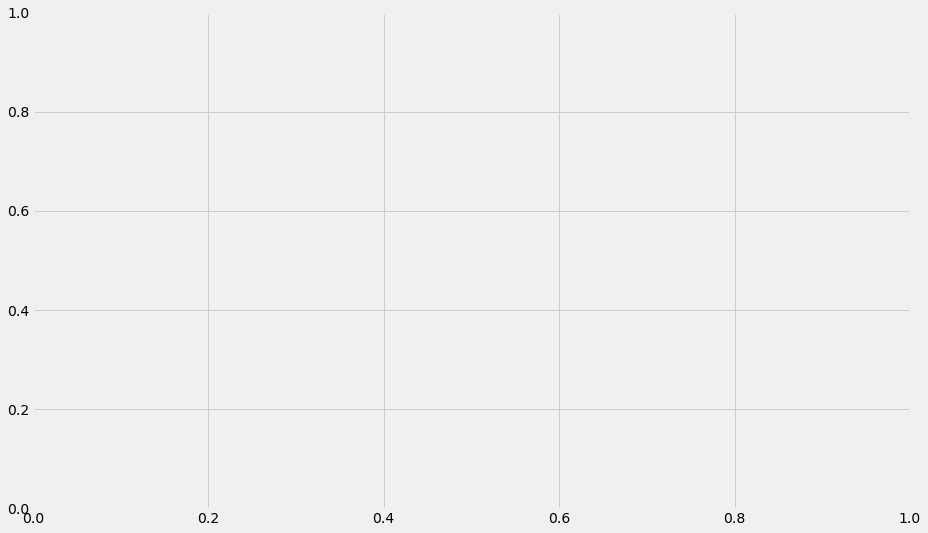

In [38]:
COLOR_SCALE = [
'#ff0000', '#ff8700', '#ffd300', '#deff0a', '#a1ff0a', '#0aff99', '#0aefff', '#147df5', '#580aff', '#be0aff'
]

fig, ax = plt.subplots(figsize = (14, 8.5))


In [39]:
for idx, group in enumerate(df_group):
    color = COLOR_SCALE[idx]
    ax.plot(group,'-o', color=color, lw=1.8, data=df_group)

In [40]:
df_group

State,Illinois,Texas,California,Florida,Louisiana
year,,,,,
2018,168.0,91.0,191.0,170.0,63.0
2019,209.0,255.0,238.0,96.0,112.0
2020,347.0,170.0,184.0,158.0,143.0
2021,450.0,304.0,229.0,184.0,156.0


In [41]:
for line, name in zip(ax.lines, df_group.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1, y), xytext=(6, 0),
                  color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                  textcoords="offset points", size=14, va="center")

In [42]:
ax.set_xlabel("Year")
ax.set_ylabel("Victims")
ax.set_title("Mass Shooting Trend (YoY)")
ax.set_xticks(df_group.index)
plt.show()

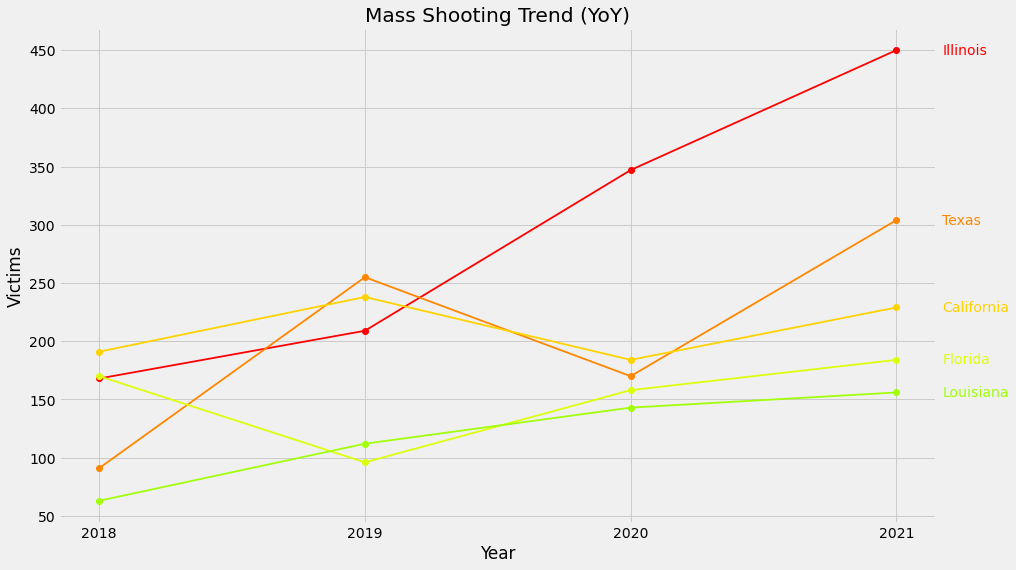

In [43]:
df["year"] = pd.DatetimeIndex(df["Date"]).year
df_group = df.reset_index().groupby(['State', 'year'], dropna=True)['Total'].aggregate('sum').unstack()
    
df_group = df_group.dropna()

df_group['Total'] = df_group[2018] + df_group[2019] + df_group[2020] +df_group[2021] +df_group[2022]
df_group = df_group.sort_values('Total',ascending=False)[:5]
df_group = df_group.drop(columns=['Total'],axis=1)
cols = [2018, 2019, 2020, 2021, 2022]
index = ['Illinois', 'California', 'Texas', 'Florida', 'Louisiana','Pennsylvania', 'New York', 'Georgia', 'Missouri', 'North Carolina']
df_group = df_group.transpose()

df_group = df_group.reset_index()
df_group = df_group.set_index('year',drop=True)
df_group = df_group[:-1] #remove 2022

COLOR_SCALE = [
'#ff0000', '#ff8700', '#ffd300', '#deff0a', '#a1ff0a', '#0aff99', '#0aefff', '#147df5', '#580aff', '#be0aff'
]

fig, ax = plt.subplots(figsize = (14, 8.5))



for idx, group in enumerate(df_group):
    color = COLOR_SCALE[idx]
    ax.plot(group,'-o', color=color, lw=1.8, data=df_group)

for line, name in zip(ax.lines, df_group.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1, y), xytext=(6, 0),
                  color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                  textcoords="offset points", size=14, va="center")
    
ax.set_xlabel("Year")
ax.set_ylabel("Victims")
ax.set_title("Mass Shooting Trend (YoY)")
ax.set_xticks(df_group.index)
plt.show()

2018 to 2021 : 
* Victim counts increased in Illinois,Texas and California..
* Victim counts decreased in Missouri and New York ...

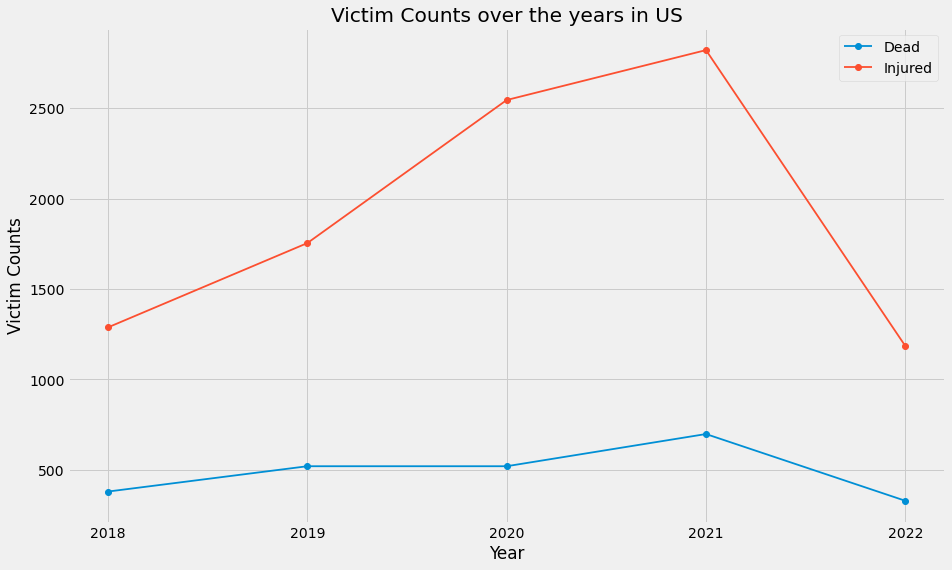

In [44]:
fig, ax = plt.subplots(figsize = (14, 8.5))
victims = df.groupby('year')[['Dead','Injured']].sum()
ax.plot(victims['Dead'],'o-',label='Dead',lw=1.8)
ax.plot(victims['Injured'],'o-',label='Injured',lw=1.8)
ax.legend(loc='upper right')
ax.set_xticks(victims.index)
ax.set_title('Victim Counts over the years in US')
ax.set_ylabel('Victim Counts')
ax.set_xlabel('Year')
plt.show()

* Injured Victims are more than the Dead Victims .
* There is decrease in the trend of victim counts but it wouldn't be wise to consider it because the data of 2022 victims is only available till march and more than the half year is still left for the end of 2022 . (Victim counts may increase on later stages ) 


<h1 style="color:#c81d25;">Word Cloud for description</h1>

In [45]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [46]:
df.Description.head(10)

0    A dispute began at a rented Airbnb during a Ne...
1    One person was killed and three people were wo...
2    A gunman shot and killed his girlfriend, her t...
3    Three people were killed and two others were w...
4    Seven people were wounded during a shooting at...
5    Four people were wounded during a shooting at ...
6    Five people were injured in a shooting outside...
7              Five people were wounded in a shooting.
8    One person was killed and three others were in...
9    Four men were injured in a shooting that occur...
Name: Description, dtype: object

In [49]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

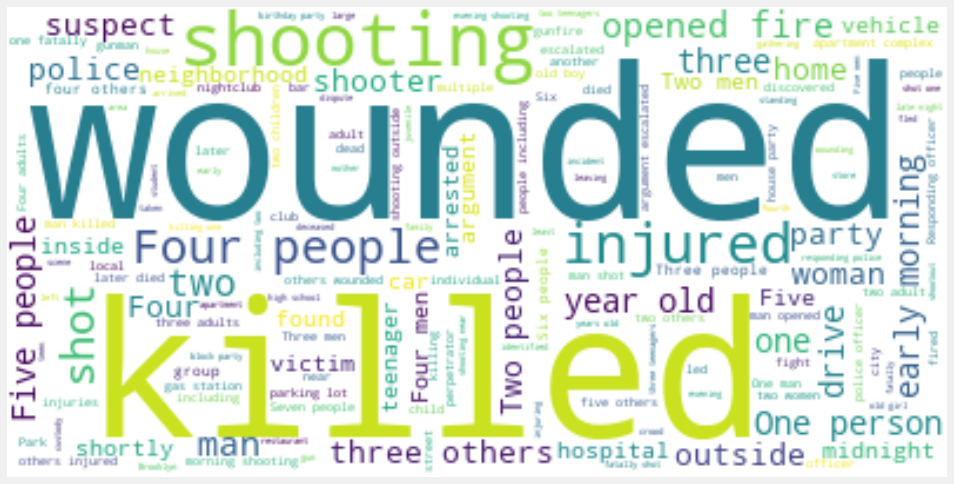

In [48]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

text = " ".join(i for i in df.Description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Words which have High Occurences in the description : 
* Wounded
* Killed 
* Injured
* Shooting 

All these words are relevant with the mass shooting data

<h1 style="color:#c81d25;">Victim Counts on  US Public Holidays in 2021</h1>

In [ ]:
type(df_2021['Date'][0])

In [ ]:
df_2021['Date'] = pd.to_datetime(df_2021['Date'])

In [ ]:
cal = calendar()

In [ ]:
holidays = cal.holidays(start=df_2021['Date'].min(), end=df_2021['Date'].max())

In [ ]:
df_2021['holiday'] =df_2021['Date'].isin(holidays)

In [ ]:
df_2021['holiday']

In [ ]:
date = df_2021.groupby(['Date','holiday'])['Total'].sum().reset_index()
# date.drop('Date',axis=1,inplace=True)

In [ ]:
date

In [ ]:
date['Date'] = date['Date'].dt.strftime('%Y-%m-%d')
# # sns.lmplot(date['datenum'] ,'Total', data =date, hue='holiday', fit_reg=False)

In [ ]:
date['Date']

In [ ]:
# sns.lmplot('datenum', 'Total', data=date , hue = 'holiday',fit_reg=False)
color = ["#0ad2ff","#2962ff","#9500ff","#ff0059","#ff8c00","#b4e600","#0fffdb"]
holiday_crime =date[date['holiday']==True]
holiday_crime.reset_index(inplace=True)
holiday_crime
sns.barplot(x='Date',y='Total',data = holiday_crime ,palette=color)
plt.xticks(rotation=45)
plt.title('Mass Shooting on US Public Holidays (2021)')
plt.ylabel('Victim Counts')
plt.show()

In [ ]:
plt.subplots(figsize=(14, 8.5))

df_2021['Date'] = pd.to_datetime(df_2021['Date'])
cal = calendar()
holidays = cal.holidays(start=df_2021['Date'].min(), end=df_2021['Date'].max())
df_2021['holiday'] =df_2021['Date'].isin(holidays)
date = df_2021.groupby(['Date','holiday'])['Total'].sum().reset_index()
# date.drop('Date',axis=1,inplace=True)
date['Date'] = date['Date'].dt.strftime('%Y-%m-%d')
# # sns.lmplot(date['datenum'] ,'Total', data =date, hue='holiday', fit_reg=False)

# sns.lmplot('datenum', 'Total', data=date , hue = 'holiday',fit_reg=False)
color = ["#0ad2ff","#2962ff","#9500ff","#ff0059","#ff8c00","#b4e600","#0fffdb"]
holiday_crime =date[date['holiday']==True]
holiday_crime.reset_index(inplace=True)
holiday_crime
sns.barplot(x='Date',y='Total',data = holiday_crime ,palette=color)
plt.xticks(rotation=45)
plt.title('Mass Shooting on US Public Holidays (2021)')
plt.ylabel('Victim Counts')
plt.show()

* Victim counts on New Year's Eve and New Year's Day is high 